In [1]:
import pandas as pd
import numpy as np
import sklearn.ensemble
import lime.lime_tabular_mod
import matplotlib.pyplot as plt
import doc.mod.utils.DatasetRepository as dr
from sklearn.model_selection import train_test_split

import importlib
importlib.reload(dr)
repo = dr.DatasetRepository("../data")

pd.set_option("display.max_columns", None)
pd.set_option("mode.chained_assignment", None)
plt.style.use({"figure.facecolor": "white"})

## Load Titanic dataset

In [2]:
data = pd.read_csv("../data/titanic/train.csv").set_index("PassengerId")
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [4]:
preprocessed_data = data.drop(columns=["Name", "Ticket"])
preprocessed_data["cabin_level"] = data["Cabin"].str[0].fillna("N/A")
preprocessed_data.drop(columns=["Cabin"], inplace=True)
preprocessed_data["Embarked"] = preprocessed_data["Embarked"].fillna("N/A")
preprocessed_data["Age"] = preprocessed_data["Age"].fillna(preprocessed_data["Age"].mean())


train, test = train_test_split(
    preprocessed_data, test_size=0.1, stratify=preprocessed_data["Survived"])
train_labels = train.pop("Survived")
test_labels = test.pop("Survived")
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_level
PassengerId,,,,,,,,
324,2,female,22.000000,1,1,29.0000,S,N/A
603,1,male,29.699118,0,0,42.4000,S,N/A
633,1,male,32.000000,0,0,30.5000,C,B
65,1,male,29.699118,0,0,27.7208,C,N/A
357,1,female,22.000000,0,1,55.0000,S,E
...,...,...,...,...,...,...,...,...
857,1,female,45.000000,1,1,164.8667,S,N/A
70,3,male,26.000000,2,0,8.6625,S,N/A
403,3,female,21.000000,1,0,9.8250,S,N/A


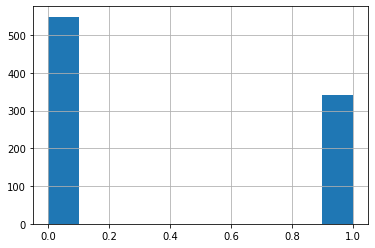

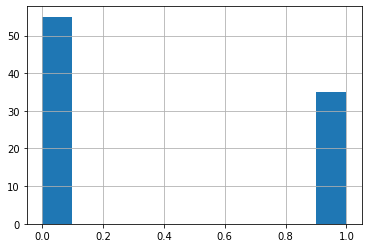

In [5]:
data["Survived"].hist()
plt.show()
test_labels.hist()
plt.show()

## Load fetal health dataset

In [6]:
data = pd.read_csv("../data/fetal_health/fetal_health.csv")
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


<AxesSubplot:>

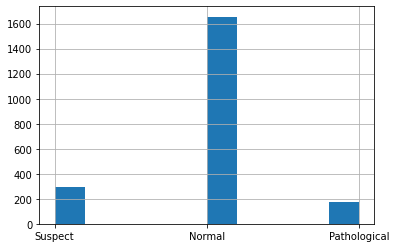

In [7]:
preprocessed_data = data.copy()
preprocessed_data["fetal_health"] = preprocessed_data["fetal_health"].map({
    1: "Normal",
    2: "Suspect",
    3: "Pathological"
})
preprocessed_data["fetal_health"].hist()

In [8]:
train, test = train_test_split(
    preprocessed_data, test_size=0.2, stratify=preprocessed_data["fetal_health"])
train_labels = train.pop("fetal_health")
test_labels = test.pop("fetal_health")
train

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1760,120.0,0.003,0.000,0.001,0.009,0.0,0.000,57.0,1.5,0.0,8.0,78.0,79.0,157.0,5.0,1.0,113.0,115.0,119.0,28.0,0.0
171,116.0,0.000,0.000,0.005,0.000,0.0,0.000,48.0,0.6,26.0,5.5,12.0,114.0,126.0,1.0,0.0,120.0,120.0,122.0,0.0,0.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.000,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0
1425,144.0,0.004,0.000,0.001,0.001,0.0,0.000,40.0,0.9,5.0,8.3,97.0,82.0,179.0,7.0,1.0,152.0,153.0,154.0,7.0,1.0
1101,122.0,0.004,0.000,0.003,0.000,0.0,0.000,21.0,1.7,0.0,14.9,55.0,104.0,159.0,1.0,1.0,126.0,127.0,128.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,131.0,0.012,0.000,0.006,0.000,0.0,0.000,28.0,1.4,0.0,4.3,52.0,118.0,170.0,8.0,0.0,143.0,145.0,145.0,8.0,0.0
881,136.0,0.000,0.000,0.007,0.000,0.0,0.000,39.0,0.9,0.0,12.6,41.0,110.0,151.0,3.0,0.0,139.0,139.0,140.0,1.0,1.0
683,132.0,0.000,0.298,0.002,0.002,0.0,0.004,37.0,2.3,0.0,0.0,111.0,54.0,165.0,5.0,1.0,75.0,87.0,77.0,86.0,-1.0
251,130.0,0.000,0.009,0.006,0.000,0.0,0.000,67.0,0.5,22.0,14.3,84.0,72.0,156.0,12.0,0.0,143.0,140.0,143.0,4.0,1.0


## Load wines dataset

In [9]:
data = pd.read_csv("../data/wine_quality/winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
preprocessed_data = data.copy()

train, test = train_test_split(
    preprocessed_data, test_size=0.1, stratify=preprocessed_data["quality"])
train_labels = train.pop("quality")
test_labels = test.pop("quality")
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
635,8.7,0.840,0.00,1.4,0.065,24.0,33.0,0.99540,3.27,0.55,9.70
1570,6.4,0.360,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.40
933,7.4,0.610,0.01,2.0,0.074,13.0,38.0,0.99748,3.48,0.65,9.80
1395,8.6,0.685,0.10,1.6,0.092,3.0,12.0,0.99745,3.31,0.65,9.55
1137,10.4,0.520,0.45,2.0,0.080,6.0,13.0,0.99774,3.22,0.76,11.40
...,...,...,...,...,...,...,...,...,...,...,...
1048,9.3,0.490,0.36,1.7,0.081,3.0,14.0,0.99702,3.27,0.78,10.90
826,7.5,0.270,0.34,2.3,0.050,4.0,8.0,0.99510,3.40,0.64,11.00
272,10.9,0.370,0.58,4.0,0.071,17.0,65.0,0.99935,3.22,0.78,10.10
963,8.8,0.270,0.39,2.0,0.100,20.0,27.0,0.99546,3.15,0.69,11.20


## Load mushrooms dataset

In [11]:
data = pd.read_csv("../data/mushrooms/mushrooms.csv")
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [13]:
import re
legend = """
    cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
    cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
    cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
    bruises: bruises=t,no=f
    odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
    gill-attachment: attached=a,descending=d,free=f,notched=n
    gill-spacing: close=c,crowded=w,distant=d
    gill-size: broad=b,narrow=n
    gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
    stalk-shape: enlarging=e,tapering=t
    stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
    stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
    stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
    veil-type: partial=p,universal=u
    veil-color: brown=n,orange=o,white=w,yellow=y
    ring-number: none=n,one=o,two=t
    ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
    spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
    population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
    habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
"""
dict_str = {}
for line in legend.splitlines():
    column_match = re.findall(r"([\w-]+):", line)
    mapping_match = re.findall(r"(\w+=\w)", line)
    if len(column_match) == 1:
        column = column_match[0]
    else:
        continue
    str_representation = "{"
    for mapping in mapping_match:
        inner_mapping_match = re.findall(r"(\w+)", mapping)
        key = inner_mapping_match[1]
        value = inner_mapping_match[0]
        str_representation += f"'{key}': '{value}', "
    str_representation = str_representation[:-2] + "}"
    dict_str[column] = str_representation

In [14]:
preprocessed_data = data.copy()
preprocessed_data["class"] = preprocessed_data["class"].map({
    "e": "edible",
    "p": "poisonous"
})
for column, mapping in dict_str.items():
    preprocessed_data[column] = preprocessed_data[column].map(eval(mapping))
preprocessed_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,NaN,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,NaN,smooth,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,NaN,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,NaN,smooth,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [15]:
train, test = train_test_split(
    preprocessed_data, test_size=0.2, stratify=preprocessed_data["class"])
train_labels = train.pop("class")
test_labels = test.pop("class")
train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6393,flat,scaly,brown,no,fishy,free,close,narrow,buff,tapering,NaN,silky,smooth,white,white,partial,white,one,evanescent,white,several,woods
768,bell,scaly,yellow,bruises,almond,free,close,broad,gray,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,scattered,meadows
543,convex,scaly,yellow,bruises,almond,free,close,broad,pink,enlarging,rooted,smooth,scaly,white,white,partial,white,one,pendant,black,scattered,grasses
3387,flat,fibrous,red,bruises,none,free,close,broad,brown,tapering,bulbous,smooth,smooth,gray,white,partial,white,one,pendant,brown,several,woods
6667,convex,smooth,red,no,spicy,free,close,narrow,buff,tapering,NaN,silky,smooth,pink,pink,partial,white,one,evanescent,white,several,woods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696,knobbed,scaly,red,no,foul,free,close,narrow,buff,tapering,NaN,smooth,smooth,pink,pink,partial,white,one,evanescent,white,several,woods
1918,flat,fibrous,brown,no,none,free,crowded,broad,black,tapering,equal,smooth,fibrous,white,white,partial,white,one,evanescent,black,scattered,grasses
1553,flat,fibrous,white,no,none,free,crowded,broad,brown,tapering,equal,fibrous,fibrous,white,white,partial,white,one,evanescent,black,abundant,grasses
511,bell,scaly,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,grasses


## Load heart disease dataset

In [16]:
data = pd.read_csv("../data/heart/heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [17]:
preprocessed_data = data.copy()

train, test = train_test_split(
    preprocessed_data, test_size=0.1, stratify=preprocessed_data["target"])
train_labels = train.pop("target")
test_labels = test.pop("target")
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3


In [20]:
train_data, train_labels, test_data, test_labels = repo.get_wines_dataset()
train_data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1160,10.6,0.360,0.57,2.3,0.087,6.0,20.0,0.99676,3.14,0.72,11.1
131,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0
663,10.1,0.280,0.46,1.8,0.050,5.0,13.0,0.99740,3.04,0.79,10.2
854,9.3,0.360,0.39,1.5,0.080,41.0,55.0,0.99652,3.47,0.73,10.9
301,11.1,0.180,0.48,1.5,0.068,7.0,15.0,0.99730,3.22,0.64,10.1
...,...,...,...,...,...,...,...,...,...,...,...
172,8.0,0.420,0.17,2.0,0.073,6.0,18.0,0.99720,3.29,0.61,9.2
1193,6.4,0.885,0.00,2.3,0.166,6.0,12.0,0.99551,3.56,0.51,10.8
372,9.1,0.280,0.48,1.8,0.067,26.0,46.0,0.99670,3.32,1.04,10.6
117,7.8,0.560,0.12,2.0,0.082,7.0,28.0,0.99700,3.37,0.50,9.4
